# Day 2

Today, we will start using nf-core pipelines to find differentially abundant genes in our dataset. 
We are using data from the following paper: https://www.nature.com/articles/s41593-023-01350-3#Sec10

1. Please take some time to read through the paper and understand their approach, hypotheses and goals.

What was the objective of the study?

The aim of the study was to examine how chronic treatment with oxycodone and subsequent withdrawal affect both behavioral and physiological responses in mice. The emphasis is especially on sensory hypersensitivity and the molecular mechanisms that contribute to opioid dependence.

What do the conditions mean?

oxy: indicates the group receiving oxycodone injection.
sal: indicates the group receiving saline injection.

What do the genotypes mean?

SNI: experimental group with prolonged spared nerve injury. 
Sham: control group that undergoes a surgical procedure without the actual nerve injury

Imagine you are the bioinformatician in the group who conducted this study. They hand you the raw files and ask you to analyze them.

What would you do?
Which groups would you compare to each other?
Please also mention which outcome you would expect to see from each comparison.

1) I would start by comparing Sham-Sal and Sham-Oxy to see how oxycodone affects the control group (pain-free mice) in terms of weight loss and sensory hypersensitivity. I would expect minimal initial hypersensitivity, but some development of opioid dependence and withdrawal symptoms.
2) Then I would compare SNI-Sal and SNI-Oxy. I would expect temporary relief from pain with oxycodone, which worsens after withdrawal.
3) Next, I would compare SNI-Oxy with Sham-Oxy to see how oxycodone impacts injured vs. pain-free mice and to examine withdrawal effects. I expect that SNI mice may show more severe withdrawal symptoms than pain-free mice.
4) Additionally, I would compare SNI-Sal vs. Sham-Sal as a baseline to see how nerve injury alone alters sensory behavior, independent of oxycodone.

NOTE FOR FURTHER ANALYSIS: In the paper, the authors performed three key comparisons: SNI-Sal vs. Sham-Sal, Sham-Oxy vs. Sham-Sal, and SNI-Oxy vs. Sham-Sal. In my contrast file, I replicated these comparisons to ensure proper evaluation in line with the authors' methodology.

Your group gave you a very suboptimal excel sheet (conditions_runs_oxy_project.xlsx) to get the information you need for each run they uploaded to the SRA.<br>
So, instead of directly diving into downloading the data and starting the analysis, you first need to sort the lazy table.<br>
Use Python and Pandas to get the table into a more sensible order.<br>
Then, perform some overview analysis and plot the results
1. How many samples do you have per condition?
2. How many samples do you have per genotype?
3. How often do you have each condition per genotype?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install openpyxl

In [4]:
df = pd.read_excel("/Users/weronikajaskowiak/Desktop/practical_course_2/day_2/conditions_runs_oxy_project.xlsx")
#print(df)

sorted_df = df.sort_values(by=['Condition: Oxy', 'Genotype: SNI'], ascending=[True, True])
print(sorted_df)

# How many samples do you have per condition?

saline_count = sorted_df['condition: Sal'].value_counts(dropna=True)
oxy_count = sorted_df['Condition: Oxy'].value_counts(dropna=True)
print(f"Number of Sal condition: {saline_count['x']}")
print(f"Number of Oxy condition: {oxy_count['x']}")  

#How many samples do you have per genotype?

sni_count = sorted_df['Genotype: SNI'].value_counts(dropna=True)
sham_count = sorted_df['Genotype: Sham'].value_counts(dropna=True)
print(f"Number of SNI genotype: {sni_count['x']}")
print(f"Number of Sham genotype: {sham_count['x']}")  

#How often do you have each condition per genotype?

sal_sni_count = len(sorted_df[(sorted_df['condition: Sal'] == 'x') & (sorted_df['Genotype: SNI'] == 'x')])
oxy_sni_count = len(sorted_df[(sorted_df['Condition: Oxy'] == 'x') & (sorted_df['Genotype: SNI'] == 'x')])
sal_sham_count = len(sorted_df[(sorted_df['condition: Sal'] == 'x') & (sorted_df['Genotype: Sham'] == 'x')])
oxy_sham_count = len(sorted_df[(sorted_df['Condition: Oxy'] == 'x') & (sorted_df['Genotype: Sham'] == 'x')])

print(f"Condition Sal and Genotype SNI: {sal_sni_count}")
print(f"Condition Sal and Genotype Sham: {sal_sham_count}")
print(f"Condition Oxy and Genotype SNI: {oxy_sni_count}")
print(f"Condition Oxy and Genotype Sham: {oxy_sham_count}")


   Patient          Run RNA-seq  DNA-seq condition: Sal Condition: Oxy  \
3        ?  SRR23195508       x      NaN            NaN              x   
4        ?  SRR23195509       x      NaN            NaN              x   
11       ?  SRR23195516       x      NaN            NaN              x   
12       ?  SRR23195517       x      NaN            NaN              x   
1        ?  SRR23195506       x      NaN            NaN              x   
6        ?  SRR23195511       x      NaN            NaN              x   
9        ?  SRR23195514       x      NaN            NaN              x   
14       ?  SRR23195519       x      NaN            NaN              x   
0        ?  SRR23195505       x      NaN              x            NaN   
5        ?  SRR23195510       x      NaN              x            NaN   
8        ?  SRR23195513       x      NaN              x            NaN   
13       ?  SRR23195518       x      NaN              x            NaN   
2        ?  SRR23195507       x      N

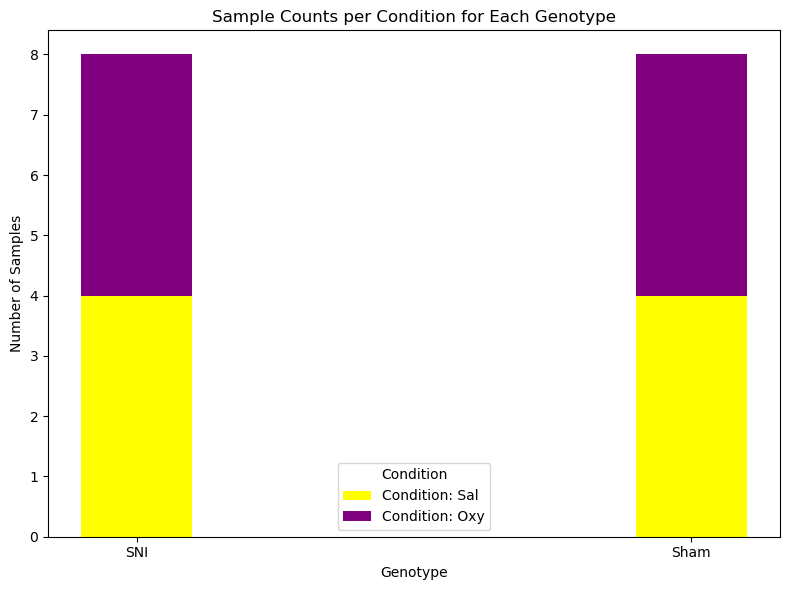

In [5]:
plt.figure(figsize=(8, 6))

bar_positions = ['SNI', 'Sham']
bar_width = 0.2
plt.bar(bar_positions[0], sal_sni_count, width=bar_width, color='yellow', label='Condition: Sal')
plt.bar(bar_positions[0], oxy_sni_count, width=bar_width, color='purple', bottom=sal_sni_count, label='Condition: Oxy')

plt.bar(bar_positions[1], sal_sham_count, width=bar_width, color='yellow')
plt.bar(bar_positions[1], oxy_sham_count, width=bar_width, color='purple', bottom=sal_sham_count)

plt.title('Sample Counts per Condition for Each Genotype')
plt.xlabel('Genotype')
plt.ylabel('Number of Samples')

plt.legend(title='Condition')
plt.tight_layout() 
plt.show()




They were so kind to also provide you with the information of the number of bases per run, so that you can know how much space the data will take on your Cluster.<br>
Add a new column to your fancy table with this information (base_counts.csv) and sort your dataframe according to this information and the condition.

Then select the 2 smallest runs from your dataset and download them from SRA (maybe an nf-core pipeline can help here?...)

   Patient          Run RNA-seq  DNA-seq condition SAL condition OXY  \
2        ?  SRR23195516       x      NaN           NaN             x   
5        ?  SRR23195511       x      NaN           NaN             x   
3        ?  SRR23195517       x      NaN           NaN             x   
8        ?  SRR23195505       x      NaN             x           NaN   
0        ?  SRR23195508       x      NaN           NaN             x   
7        ?  SRR23195519       x      NaN           NaN             x   
1        ?  SRR23195509       x      NaN           NaN             x   
6        ?  SRR23195514       x      NaN           NaN             x   
9        ?  SRR23195510       x      NaN             x           NaN   
13       ?  SRR23195512       x      NaN             x           NaN   
15       ?  SRR23195520       x      NaN             x           NaN   
4        ?  SRR23195506       x      NaN           NaN             x   
11       ?  SRR23195518       x      NaN             x          

Text(0.5, 1.0, 'Histogram of Bases')

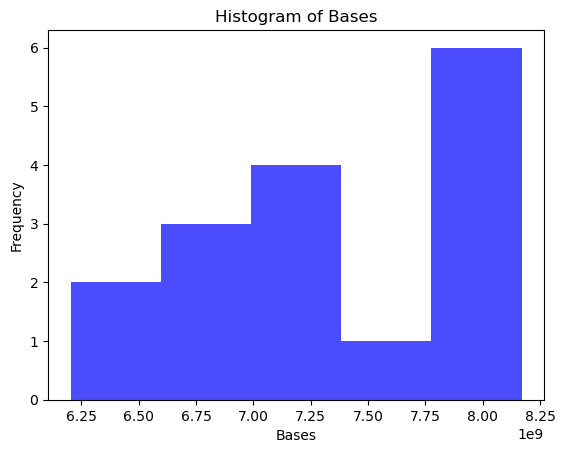

In [6]:
df_2 = pd.read_csv("/Users/weronikajaskowiak/Desktop/practical_course_2/day_2/base_counts.csv")
#print(df_2)

merged_df = pd.merge(sorted_df, df_2, on='Run', how='left') 
prepared_table = merged_df.rename(columns={'condition: Sal': 'condition SAL', 'Condition: Oxy': 'condition OXY', 'Genotype: SNI':'genotype SNI', 'Genotype: Sham': 'genotype SHAM'})
sorted_merged=prepared_table.sort_values(by=["Bases"], ascending=[True])
print(sorted_merged)

plt.hist(sorted_merged['Bases'], bins=5, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Bases')
plt.ylabel('Frequency')
plt.title('Histogram of Bases')

In [7]:
#Select the 2 smallest runs from your dataset and download them from SRA
sorted_merged[['Run']].head(2).to_csv('/Users/weronikajaskowiak/Desktop/practical_course_2/day_2/smallest.csv', index=False, header=False)

In [15]:
#run worklflow
!nextflow run nf-core/fetchngs -profile docker --input '/Users/weronikajaskowiak/Desktop/practical_course_2/day_2/smallest.csv' --outdir '/Users/weronikajaskowiak/Desktop/practical_course_2/day_2/files' --max_memory 8.GB

Nextflow 24.04.4 is available - Please consider updating your version to it
N E X T F L O W  ~  version 23.10.1
Launching `https://github.com/nf-core/fetchngs` [cheeky_torvalds] DSL2 - revision: 8ec2d934f9 [master]
WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/fetchngs v1.12.0-g8ec2d93
------------------------------------------------------
Core Nextflow options
  revision       : master
  runName        : cheeky_torvalds
  containerEngine: docker
  launchDir      : /Users/weronikajaskowiak/Desktop/practical_course_2/day_2
  workDir        : /Users/weronikajaskowiak/Desktop/practical_course_2/day_2

While your files are downloading, get back to the paper and explain how you would try to reproduce the analysis.<br>
When you are done with this shout, so we can discuss the different ideas.

I will follow the steps outlined in the paper, starting with performing experiments on mice, followed by behavioral assessments. Next, I will conduct data analysis, including statistical analysis using models to evaluate behavioral, molecular, and transcriptomic data. For cross-validation with transcriptomics, I will compare transcriptional changes across different regions of the brain to identify key gene expression profiles affected by withdrawal and treatment. After completing this, I can compare the key results of the original study with our findings to see if they align.